The objective is to have the model recognize a typing based off a pokemon's attack and special attack stats. For this project I chose Fighting types and psychic types. If the Pokemon is designed to be a  humanoid that knows martial arts, it will utilize its fists (attack stat) instead of energy beams (special attack) befitting of the physically frail psychic types. 

First I import all of the data preperation, visualizations, models, and evaluation tools along with the dataframe. I also dropped the legendary pokemon becuase they're usually outliers in terms of their stats.

In [69]:

import pandas as pd
import sklearn as sk
from matplotlib import pyplot
import matplotlib

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.model_selection


df = pd.read_csv(r"C:\Users\Jason Lee\Downloads\Pokemon.csv")
#Call the pokemon dataset and make a dataframe out of it
df["Type 1"].unique()

df = df.drop(df[df["Legendary"]==True].index)
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


# Data Preperation

Now I need to drop all the other rows containing other pokemon types

Dataset.drop drops the following ROWS if the following is true: if the row's type 1 catagory is not "fighting" or "psychic". Now I created a new dataframe that displays only fighting and psychic types.

For this project, I'm not going to account for the "Type 2" column because that's the secondary typing which can influence the base stat thus confusing the model. 

In [74]:

fighting_and_psychic_only = df.drop(df[
    (df['Type 1'] != "Fighting")&
    (df['Type 1'] != "Psychic")].index)

print(fighting_and_psychic_only)


print(fighting_and_psychic_only.groupby("Type 1").size())




       #            Name    Type 1  Type 2  Total  HP  Attack  Defense  \
61    56          Mankey  Fighting     NaN    305  40      80       35   
62    57        Primeape  Fighting     NaN    455  65     105       60   
68    63            Abra   Psychic     NaN    310  25      20       15   
69    64         Kadabra   Psychic     NaN    400  40      35       30   
70    65        Alakazam   Psychic     NaN    500  55      50       45   
..   ...             ...       ...     ...    ...  ..     ...      ...   
743  675         Pangoro  Fighting    Dark    495  95     124       78   
745  677          Espurr   Psychic     NaN    355  62      48       54   
746  678    MeowsticMale   Psychic     NaN    466  74      48       76   
747  678  MeowsticFemale   Psychic     NaN    466  74      48       76   
771  701        Hawlucha  Fighting  Flying    500  78      92       75   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
61        35       45     70           1      False  
62 

# Data Visualization

I already play the games enough to know that psychic types have high special attack and low attack and vice-versa for fighting types. But to prove this I made some visualizations. 
The orange in the first histogram, for the fighting type dataframe, refers to its special attack which find itself pretty low on average. The orange on the 2nd histogram, for the psychic type dataframe is the psychic type's attack which is also low on average. 

<AxesSubplot: >

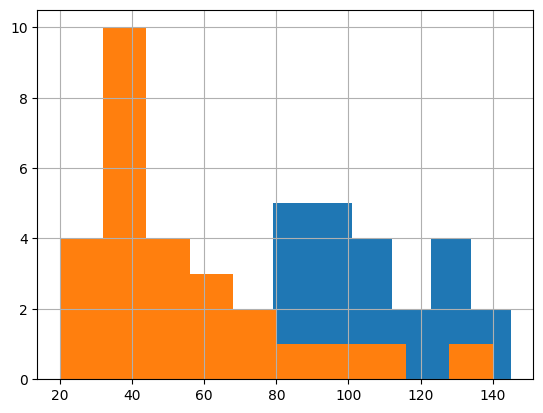

In [80]:
fighting_only = fighting_and_psychic_only[fighting_and_psychic_only["Type 1"] == "Fighting"]
fighting_only["Attack"].hist()
fighting_only["Sp. Atk"].hist()

<AxesSubplot: >

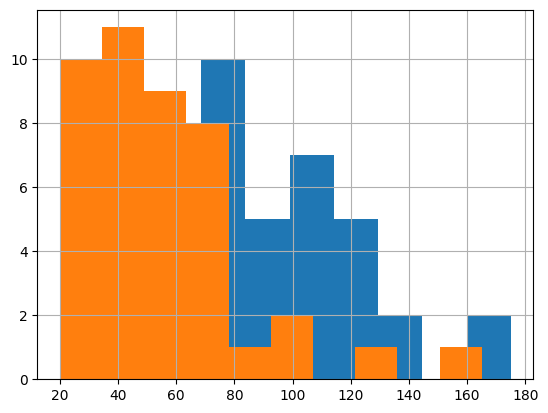

In [78]:
psychic_only = fighting_and_psychic_only[fighting_and_psychic_only["Type 1"] == "Psychic"]

psychic_only["Sp. Atk"].hist()
psychic_only["Attack"].hist()

# Modeling

I'll be using supervised models so a label set (the typing of the pokemon) is needed and the features. The most important feature, according to the data visualization, are the base stats mainly attack and special attack. 

I slice the array according to the location of the base stat columns and the primary typing column.

In [45]:
array = fighting_and_psychic_only.values

X = array[:,4:9]#Stats
print(X)
y = array[:,2] #typing (validation set)

print(y)


#


[[305 40 80 35 35]
 [455 65 105 60 60]
 [310 25 20 15 105]
 [400 40 35 30 120]
 [500 55 50 45 135]
 [590 55 50 65 175]
 [305 70 80 50 35]
 [405 80 100 70 50]
 [505 90 130 80 65]
 [328 60 48 45 43]
 [483 85 73 70 73]
 [455 50 120 53 35]
 [455 50 105 79 35]
 [460 40 45 65 100]
 [680 106 110 90 154]
 [780 106 190 100 154]
 [780 106 150 70 194]
 [600 100 100 100 100]
 [320 40 50 45 70]
 [470 65 75 70 95]
 [525 65 65 60 130]
 [336 48 72 48 72]
 [405 190 33 58 33]
 [210 35 35 35 35]
 [455 50 95 95 35]
 [680 106 90 130 90]
 [600 100 100 100 100]
 [198 28 25 25 45]
 [278 38 35 35 65]
 [518 68 65 65 125]
 [618 68 85 65 165]
 [237 72 60 30 20]
 [474 144 120 60 40]
 [280 30 40 55 40]
 [410 60 60 75 60]
 [510 60 100 85 80]
 [330 60 25 35 70]
 [470 80 45 65 90]
 [425 65 50 70 95]
 [260 95 23 48 23]
 [600 50 150 50 150]
 [600 50 180 20 180]
 [600 50 70 160 70]
 [600 50 95 90 95]
 [285 45 30 50 65]
 [310 20 25 45 70]
 [285 40 70 40 35]
 [525 70 110 70 115]
 [625 70 145 88 140]
 [518 68 125 65 65]
 [6

The data is prepared for the models and the visualizations helped me select the most important features. Now I can begin training.

The array and the labels are split for training and testing. I fit the models to the array with a loop and then VALIDATE them through cross validation. 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,y,test_size = 0.20, random_state =1)


    
results = []
name = []
models = []
score =[]
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

for name, model in models:
    model.fit(X_train,Y_train)

for name, model in models:
    kfolds = StratifiedKFold(n_splits=15,random_state=1, shuffle=True)
    validation = cross_val_score(model, X_train, Y_train, cv=kfolds, scoring='accuracy')
    results.append(name)
    score.append(validation)
    print(f"{name}:{validation.mean()}")
    

LR:0.8833333333333333
LDA:0.91
KNN:0.9233333333333333
CART:0.83
NB:0.8533333333333334
SVM:0.6933333333333332


I chose the best performing model and applied it to the testing array with the following results:

In [8]:
model = KNeighborsClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8823529411764706
[[ 4  2]
 [ 0 11]]
              precision    recall  f1-score   support

    Fighting       1.00      0.67      0.80         6
     Psychic       0.85      1.00      0.92        11

    accuracy                           0.88        17
   macro avg       0.92      0.83      0.86        17
weighted avg       0.90      0.88      0.88        17

